### 10. Weight Initialization

- weight의 초기화 여부에 따라 모형의 성능이 매우 달라진다. 
- 모든 초기값을 0으로 하는것은 매우 않좋은 방법이다. (학습 자체가 불가능) 
- 많이 사용되는 초기화 방법 (weight의 정규분포 또는 uniform 분포를 사용하여 초기화) 

<img src = 'img/xavier_n_he.png'>

- xavier_uniform을 통해 초기화한 코드 
    - ex> torch.nn.init.normal_(linear1.weight) --> torch.nn.init.xavier_uniform_(linear1.weight)
    - 기존 정규분포 초기화 방식에 비해 정확도 향상 확인!! 

In [1]:
import torch 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 
import timeit
device = 'cpu'
#device = 'cuda' if torch.cuda.is_available() else 'cpu'

## parameters
training_epoch = 15 
batch_size = 100
learning_rate = 0.001

## dataset 
mnist_train = dsets.MNIST(root = 'MNIST_data/', 
                          train = True, 
                          transform = transforms.ToTensor(), 
                          download = True )

mnist_test = dsets.MNIST(root = 'MNIST_data/', 
                          train = False, 
                          transform = transforms.ToTensor(), 
                          download = True )

data_loader = torch.utils.data.DataLoader(dataset = mnist_train, 
                                         batch_size = batch_size, 
                                         shuffle = True, 
                                         drop_last = True )

## use 3 layers
linear1 = torch.nn.Linear(28*28, 256, bias = True)
linear2 = torch.nn.Linear(256, 256, bias = True)
linear3 = torch.nn.Linear(256, 10, bias = True)

## 모형들의 weight를 xavier_uniform 분포로 초기화 
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

## model, cost function, optimizer 
## softmax 대신 relu & SGD 대신 Adam 사용 
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1, relu, 
                            linear2, relu, 
                            linear3, relu).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

total_batch = len(data_loader)

start_time = timeit.default_timer()  ## start time check 

for epoch in range(training_epoch) : 
    avg_cost = 0 
    for X, Y in data_loader : 
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('epoch:', epoch+1, 'cost=', avg_cost)
    
terminate_time = timeit.default_timer()  ## end time check
print('Running time :', terminate_time - start_time)

epoch: 1 cost= tensor(0.2802, grad_fn=<AddBackward0>)
epoch: 2 cost= tensor(0.0926, grad_fn=<AddBackward0>)
epoch: 3 cost= tensor(0.0600, grad_fn=<AddBackward0>)
epoch: 4 cost= tensor(0.0432, grad_fn=<AddBackward0>)
epoch: 5 cost= tensor(0.0316, grad_fn=<AddBackward0>)
epoch: 6 cost= tensor(0.0240, grad_fn=<AddBackward0>)
epoch: 7 cost= tensor(0.0230, grad_fn=<AddBackward0>)
epoch: 8 cost= tensor(0.0196, grad_fn=<AddBackward0>)
epoch: 9 cost= tensor(0.0155, grad_fn=<AddBackward0>)
epoch: 10 cost= tensor(0.0146, grad_fn=<AddBackward0>)
epoch: 11 cost= tensor(0.0119, grad_fn=<AddBackward0>)
epoch: 12 cost= tensor(0.0134, grad_fn=<AddBackward0>)
epoch: 13 cost= tensor(0.0119, grad_fn=<AddBackward0>)
epoch: 14 cost= tensor(0.0116, grad_fn=<AddBackward0>)
epoch: 15 cost= tensor(0.0087, grad_fn=<AddBackward0>)
Running time : 199.91294390000002


c:\python\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\python\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9807999730110168
Label:  3
Prediction:  3


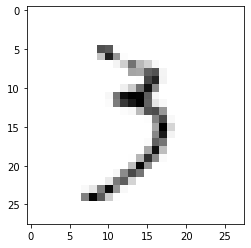

In [2]:
# Test the model using test sets
import random 
import matplotlib.pyplot as plt

with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    single_prediction = model(X_single_data)
    print('Label: ', Y_single_data.item())
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

- cf. layer를 5개로 늘여서 좀더 deep하게 해보자 
    - cost 감소 & accuracy 개선 확인!!

In [3]:
import torch 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 

device = 'cpu'
#device = 'cuda' if torch.cuda.is_available() else 'cpu'

## parameters
training_epoch = 15 
batch_size = 100
learning_rate = 0.001

## dataset 
mnist_train = dsets.MNIST(root = 'MNIST_data/', 
                          train = True, 
                          transform = transforms.ToTensor(), 
                          download = True )

mnist_test = dsets.MNIST(root = 'MNIST_data/', 
                          train = False, 
                          transform = transforms.ToTensor(), 
                          download = True )

data_loader = torch.utils.data.DataLoader(dataset = mnist_train, 
                                         batch_size = batch_size, 
                                         shuffle = True, 
                                         drop_last = True )

## use 5 layers & 256 --> 512
linear1 = torch.nn.Linear(28*28, 512, bias = True)
linear2 = torch.nn.Linear(512, 512, bias = True)
linear3 = torch.nn.Linear(512, 512, bias = True)
linear4 = torch.nn.Linear(512, 512, bias = True)
linear5 = torch.nn.Linear(512, 10, bias = True)

## 모형들의 weight를 xavier_uniform 분포로 초기화 
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

## model, cost function, optimizer 
## softmax 대신 relu & SGD 대신 Adam 사용 
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1, relu, 
                            linear2, relu, 
                            linear3, relu, 
                            linear4, relu, 
                            linear5, relu).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

total_batch = len(data_loader)

start_time = timeit.default_timer()  ## start time check 

for epoch in range(training_epoch) : 
    avg_cost = 0 
    for X, Y in data_loader : 
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('epoch:', epoch+1, 'cost=', avg_cost)
    
terminate_time = timeit.default_timer()  ## end time check
print('Running time :', terminate_time - start_time)

epoch: 1 cost= tensor(0.8149, grad_fn=<AddBackward0>)
epoch: 2 cost= tensor(0.5345, grad_fn=<AddBackward0>)
epoch: 3 cost= tensor(0.5090, grad_fn=<AddBackward0>)
epoch: 4 cost= tensor(0.4953, grad_fn=<AddBackward0>)
epoch: 5 cost= tensor(0.4883, grad_fn=<AddBackward0>)
epoch: 6 cost= tensor(0.4836, grad_fn=<AddBackward0>)
epoch: 7 cost= tensor(0.4770, grad_fn=<AddBackward0>)
epoch: 8 cost= tensor(0.4798, grad_fn=<AddBackward0>)
epoch: 9 cost= tensor(0.4702, grad_fn=<AddBackward0>)
epoch: 10 cost= tensor(0.4667, grad_fn=<AddBackward0>)
epoch: 11 cost= tensor(0.4696, grad_fn=<AddBackward0>)
epoch: 12 cost= tensor(0.4681, grad_fn=<AddBackward0>)
epoch: 13 cost= tensor(0.4652, grad_fn=<AddBackward0>)
epoch: 14 cost= tensor(0.4669, grad_fn=<AddBackward0>)
epoch: 15 cost= tensor(0.4651, grad_fn=<AddBackward0>)
Running time : 433.0705700000001


Accuracy: 0.7930999994277954
Label:  5
Prediction:  0


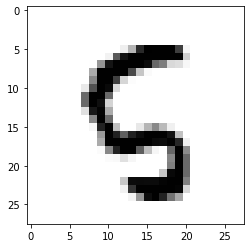

In [4]:
# Test the model using test sets
import random 
import matplotlib.pyplot as plt

with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    single_prediction = model(X_single_data)
    print('Label: ', Y_single_data.item())
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()